# Notas de Scikit-Learn

Machine Learning(Aprendizaje Automático), es una rama  de la inteligencia artificial que estudia el diseño de algoritmos que puedan aprender. 

Típicas tareas del machine learning son el aprendizaje de conceptos,el desarrollo de  modelos de predicción,  la búsqueda de patrones predictivos y el clustering. Estas tareas son aprendidas  a través de los datos disponibles observados  a través de experiencias o instrucciones. Podemos dividir los algoritmos  del machine learning en 3 categorias:

- **Aprendizaje supervisado**
- **Aprendizaje no supervisado**
- **Aprendizaje por refuerzo**
 
** [scikit](https://scikits.appspot.com/)**  es un conjunto de paquetes en Python, para temas específicos:

- scikit-image: Contiene rutina para procesamiento de imágenes en Scipy.
- scikit-monaco: Paquete relacionado a la integración de Montecarlo.
- timeseries: Un paquete para la manipulación de series de tiempo.
- scikit-learn: Un conjunto de módulos en Python, para Machine Learning y Data Minning.

La librería  [scikit-learn](scikit-learn.org/stable/a) proporciona una gran número de herramientas para la ciencia de datos y data minning en Python centrandose en el machine learning:

- scikit-learn posee excelente documentación como el  [tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) inicial o los [ejemplos](http://scikit-learn.org/dev/auto_examples/index.html).
- Posee muchos de lo algoritmos del machine learning.
- Todo se trabaja sobre [github](https://github.com/scikit-learn/scikit-learn).
- Cada método implementado sobre sckit-learn asume que la data viene en un conjunto de datos. Sckit-learn incluye algunos conjuntos de datos conocidos.

### Datos de entrenamiento, validación y de prueba


- Los datos de entrenamiento(**training**): son los datos que entrenan los modelos
- Los datos de validación (**validation**) : elecciona el mejor de los modelos entrenados.
- Los datos de prueba (**testing**): Nos ofrece el error real cometido con el modelo seleccionado.

[Hastie, Tibshirani y Friedman](http://www-stat.stanford.edu/~tibs/ElemStatLearn/) en su libro *The Elements of Statistical Learning* indican que una división típica para estos conjuntos puede ser de 50% para el entrenamiento y 25% para la validación y prueba, respectivamente.

## API de scikit-learn

Los principales "interfaces" en scikit-learn son (una clase puede implementar múltiples interfaces):

- **Estimador**:    Un estimador es un objeto que se ajuste a un modelo basado en algunos datos de entrenamiento y es capaz de inferir algunas propiedades de los nuevos datos.

    `estimador = obj.fit(data, targets)` 
    
 
- **Predictor**:

    `prediccion = obj.predict(data)` 
    
    
- **Transformador**:

    `n_data = obj.transform(data)` 
    
    
- **Modelo**:

    `s = obj.score(data)`



In [21]:
# Ejemplos

from sklearn import datasets
from numpy import logical_or
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
subconjunto = logical_or(iris.target == 0, iris.target == 1)

X = iris.data[subconjunto]
y = iris.target[subconjunto]

# Creamos el modelo
model = LogisticRegression()

# Fijamos el modelo
model.fit(X, y)
print (model.coef_)

[[-0.40731745 -1.46092371  2.24004724  1.00841492]]


In [22]:
# Para aprendizaje no supervisado

from sklearn.cluster import KMeans

# Creamos el modelo
kmeans = KMeans(n_clusters = 2)

# Fijamos el modelo
kmeans.fit(X)
print (kmeans.cluster_centers_)

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]]


In [24]:
# Reduccion de la dimension

from sklearn.decomposition import PCA

# Creamos el modelo
pca = PCA(n_components=2)

# Fijamos el modelo
pca.fit(X)
print (pca.explained_variance_)

[ 2.73946394  0.22599044]


In [25]:
# Predictores

model = LogisticRegression()
model.fit(X, y)

X_test = [[ 5.006,  3.418,  1.464,  0.244], [ 5.936,  2.77 ,  4.26 ,  1.326]]
model.predict(X_test)

array([0, 1])

In [26]:
print (model.predict_proba(X_test))

[[ 0.97741151  0.02258849]
 [ 0.01544837  0.98455163]]


In [30]:
# Ejemplo más avanzado de SVM,  usando SVC (support vector classification)

from sklearn import svm
digitos = datasets.load_digits()
clasificador = svm.SVC(gamma=0.001, C=100.)

# Fijamos el modelo

clasificador.fit(digitos.data[:-1], digitos.target[:-1])  

# Usamos los predictores en el modelo

clasificador.predict(digitos.data[-1:])


array([8])

In [33]:
# El metodo transform para aprendizaje no supervisado

pca = PCA(n_components=2)
pca.fit(X)

print (pca.transform(X)[0:5,:])

[[-1.65441341 -0.20660719]
 [-1.63509488  0.2988347 ]
 [-1.82037547  0.27141696]
 [-1.66207305  0.43021683]
 [-1.70358916 -0.21574051]]


In [36]:
# El metodo fit.transform

pca = PCA(n_components=2)
print (pca.fit_transform(X)[0:5,:])


[[-1.65441341 -0.20660719]
 [-1.63509488  0.2988347 ]
 [-1.82037547  0.27141696]
 [-1.66207305  0.43021683]
 [-1.70358916 -0.21574051]]


In [37]:
# Ejemplo sobre el metodo Model

# Utilizamos DummyClassifier un clasificador que hace predicciones simples

from sklearn.dummy import DummyClassifier

model = DummyClassifier()
model.fit(X, y)

model.score(X, y)


0.45000000000000001

Dos de las tareas más simples del machine learning es la de la `clasificación` y de  la `regresión`. Veamos el siguiente ejemplo:

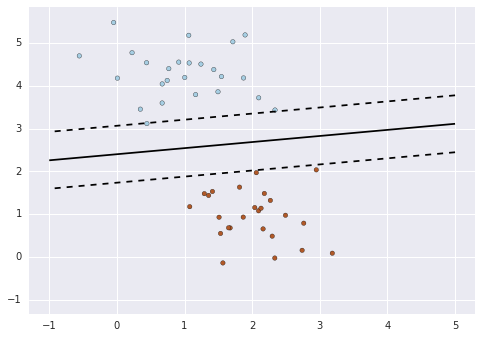

In [43]:
%run sgd_separador.py

Como se mencionó la primera  tarea es la de `clasificación`: la figura de arriba  muestra un conjunto de datos de dos dimensiones, coloreadas de acuerdo a dos clase etiquetadas  diferentes. Un algoritmo de clasificación se puede utilizar para trazar una frontera divisoria entre los dos grupos de puntos. Al dibujar esta línea de separación, hemos aprendido un modelo que se puede generalizar a nuevos datos: si tuviera que soltar  un punto en el plano que no está etiquetado, este algoritmo podría predecir si se trata de un punto azul o  rojo.


Otra tarea del machine learning es la de `regressión`, que es el ajuste de una línea a un conjunto de datos.

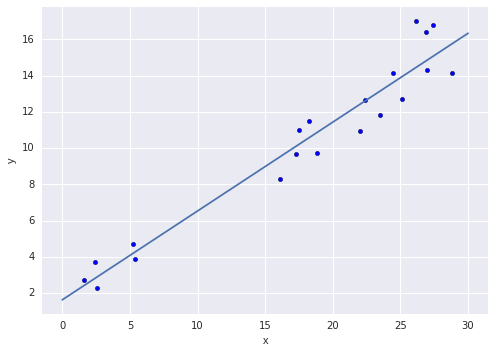

In [45]:
%run regresion.py

De nuevo, este es un ejemplo de ajuste de un modelo a los datos, de tal manera que el modelo puede hacer generalizaciones acerca de nuevos datos. El modelo que ha aprendido de los datos de entrenamiento, se puede utilizar para predecir el resultado de datos de prueba: aquí, se podría dar un valor x, y el modelo nos permitiría predecir el valor de y.

## Algoritmos en machine learning

### Aprendizaje supervisado


Estos algoritmos consisten en una variable de salida/resultado (o variable dependiente) que ha de ser predicha a partir de un conjunto dado de predictores (variables independientes). Usando  este conjunto de variables, generamos una función que se asignan las entradas a las salidas deseadas. El proceso de formación continúa hasta que el modelo alcanza un nivel deseado de precisión en los datos de entrenamiento. Algunos ejemplos:

- [**Linear Regression**](https://jeremykun.com/2013/08/18/linear-regression/).
- [** Logistic Regression**](http://blog.yhat.com/posts/logistic-regression-and-python.html).
- [**KNN**](https://jeremykun.com/2012/08/26/k-nearest-neighbors-and-handwritten-digit-classification/).
- [**Random Forest**](http://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/).

### Aprendizaje no supervisado

En estos algoritmos, no tenemos ninguna variable objetivo o resultado para predecir/estimar. Se utiliza para la agrupación de la población en  diferentes grupos, lo que  es ampliamente utilizado para la segmentación de clientes en diferentes grupos por intervención específica. Algunos ejemplos :

- [**K-Means**](https://jeremykun.com/2012/10/08/decision-trees-and-political-party-classification/).
- [**Dimensionality Reduction Algorithms**](http://www.kdnuggets.com/2015/05/7-methods-data-dimensionality-reduction.html).

### Aprendizaje por refuerzo

Utilizando este algoritmo, la máquina está capacitada para tomar decisiones específicas. Funciona de la siguiente manera: la máquina está expuesta a un ambiente donde se entrena a sí misma continuamente mediante ensayo y error. Esta máquina aprende de la experiencia pasada y trata de captar el mejor conocimiento posible para tomar decisiones de negocio precisos. Un ejemplo:

- Procesos de decisión de Markov.
- Metodos de Montecarlo.


## Algunos ejemplos

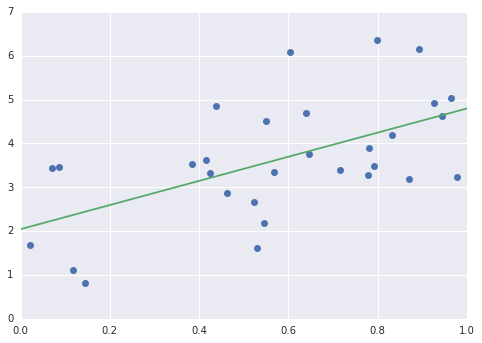

In [52]:
# Regresion lineal

# Creando la data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(30, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(30)

# Fijamos el modelo
model = LinearRegression()
model.fit(X, y)

# Dibujamos los datos y el modelo de prediccion
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

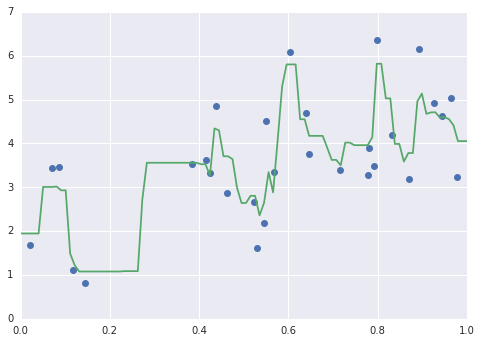

In [53]:
# Fijemos un arbol aleatorio

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Dibujamos los datos y el modelo de prediccion
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

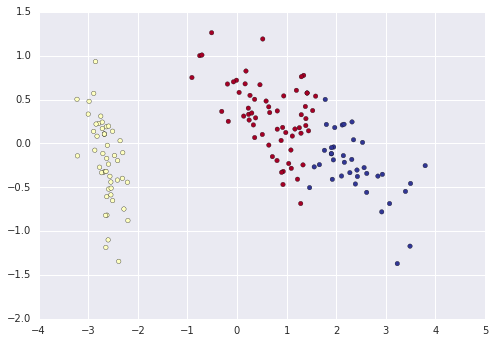

In [56]:
# Clustering: Kmeans, PCA

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fijando los RNG en Kmeans
k_means.fit(X)
y_pred = k_means.predict(X)
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

##  Validación de modelos

Una pieza importante de machine learning  es la `validación del modelo`: es decir, determinar qué tan bien el modelo puede generalizar a partir de los datos de entrenamiento futuros datos no etiquetados. Veamos un ejemplo usando el `clasificador de vecino más cercano (nearest neighbor classifier)`. Este es un clasificador muy simple: lo que hace es  almacenar todos los datos de entrenamiento, y para cualquier cantidad desconocida, simplemente devuelve la etiqueta del punto de entrenamiento más cercano.

In [57]:
# Para el conjunto de datos iris, la prediccion de los datos de entrada

from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


Una forma más útil examinar los resultados es para ver la `matriz de confusión (confusión matrix)`, o la matriz que muestra la frecuencia de las entradas y salidas:

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


Para cada clase, los 50 muestras de entrenamiento se identifican correctamente, pero en el fondo este modelo generaliza mal a los nuevos datos. Podemos simular esto mediante el fraccionamiento de nuestros datos en un conjunto de entrenamiento y un conjunto de pruebas. Scikit-learn contiene algunas rutinas convenientes para hacer esto:

In [64]:
from sklearn.cross_validation import train_test_split

Xentrenamiento, Xtest, yentrenamiento, ytest = train_test_split(X, y)
clf.fit(Xentrenamiento, yentrenamiento)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[10  0  0]
 [ 0 11  1]
 [ 0  0 16]]


Esto muestra verdadero rendimiento de nuestro clasificador: al parecer hay cierta confusión entre la segunda y la tercera especie, que podría anticipar dado lo que hemos visto de los datos anteriores.

Por esta razón, es muy importante utilizar  los datos de  `entrenamiento` y datos `test` en la evaluación de los  modelos. 

### Conjunto de datos iris

Como se ha mencionado scikit-learn tiene un conjunto de datos de la especie `iris`, cuyos datos consisten de lo siguiente:

- Características del conjunto de datos iris
 
  1.  sepal length in cm
  2.  sepal width in cm
  3.  petal length in cm
  4.  petal width in cm

- Clases a predecir

    1.  Iris Setosa
    2.  Iris Versicolour
    3.  Iris Virginica


In [69]:
from sklearn.datasets import load_iris
iris = load_iris()  # copia del archivo csv del conjunto de dato iris

iris.keys()

dict_keys(['target', 'feature_names', 'DESCR', 'target_names', 'data'])

La mayoría de los algoritmos de machine learning implementados en scikit-learn esperan que los datos se almacenen en una matriz . Las matrices pueden ser tanto matrices de  `numpy`, o en algunos casos matrices de `scipy.sparse`.

Se espera que el tamaño de la matriz sea  `[n_muestras, n_caracteristicas]`.

In [70]:
n_muestras, n_caracteristicas = iris.data.shape
print((n_muestras, n_caracteristicas))
print(iris.data[0])

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [71]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [72]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [73]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


La data es de 4 dimensiones, pero se visualizar en dos , usando matplotlib:

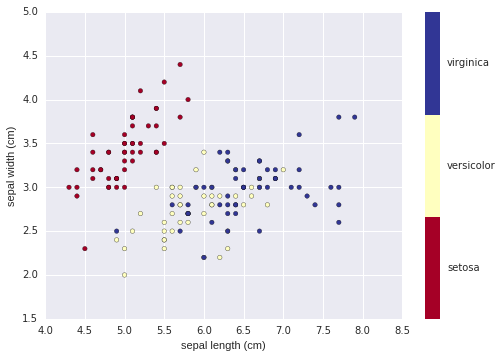

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# este formateador etiquetará la barra de colores con los nombres  de los target correctos
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);


In [76]:
# Ejemplo que resume y agrega algunas caracteristicas adicionales

from sklearn import datasets
iris = datasets.load_iris()
X_iris, Y_iris = iris.data, iris.target
print (X_iris.shape, Y_iris.shape)
print(X_iris[0], Y_iris[0])


(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


El conjunto de datos tiene 150 instancias y 4 atributos. En nuestro primer paso, separamos el conjunto de datos , usando el %75 de la instancias para 'entrenar' nuestro clasificador y el 25% para evaluarlos (estamos usando dos características: sepal width y length).

También calculamos el promedio, restamos el valor medio desde el valor caracteristico y dividimos el resultado por la desviacion estandar, lo que produce que cada característica tenga una media cero y una desviación estándar de uno. La `estandarización de valores` es muy común en machine learning, evitan que las características con grandes valores puedan ponderar demasiado los resultados finales.

(112, 2) (112,)


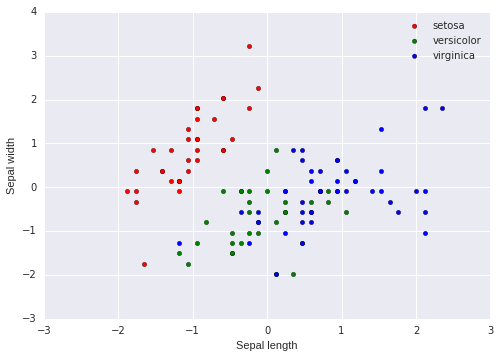

In [77]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Conseguimos el conjunto de datos solo con los dos primeros
# atributos

X,Y =X_iris[:, :2], Y_iris

# Dividir el conjunto de datos en conjuntos de entrenamiento 
# testing

X_entrenamiento, X_test, Y_entrenamiento, Y_test \
= train_test_split(X, Y, test_size = 0.25, random_state=34)
print(X_entrenamiento.shape, Y_entrenamiento.shape)

# Estandarizacion

scaler = StandardScaler().fit(X_entrenamiento)
X_entrenamiento = scaler.transform(X_entrenamiento)

X_test =scaler.transform(X_test)

# Graficando los datos de entrenamiento usando matplolib

colores = ['red', 'green', 'blue']
for i in range(len(colores)):
    px =X_entrenamiento[:,0][Y_entrenamiento == i]
    py =X_entrenamiento[:, 1][Y_entrenamiento ==i]
    plt.scatter(px, py, c =colores[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width");
#plt.show()

La setosa es facilmente separable de las otras dos clases mientras que versicolor y virginica estan dispersos entre ellos. Para implementar una clasificacion lineal, usamos el SGDClassifier desde Scikit-learn.

SGD es el método del descenso de gradiente estocástico que es muy útil para encontrar mínimos locales de una función. En este caso encontramos  un método de clasificación lineal y los coeficientes del hiperplano que minimiza  la distancia entre los puntos:


[[ -2.33956086e+01   1.02564121e+01]
 [ -2.27656252e-14  -1.51545931e+00]
 [  2.41781606e+01   3.03091862e+00]]
[-19.64684284  -2.78034459  -2.0878267 ]


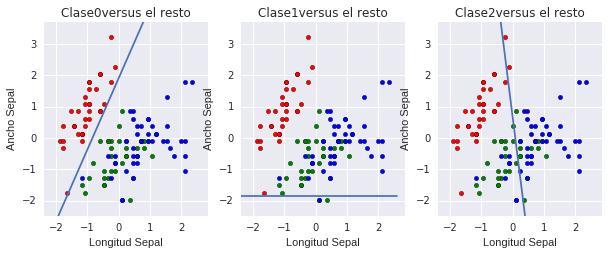

In [78]:
# Creamos un modelo lineal clasificatorio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

#fijamos el clasificador (entrenamiento)
clf.fit(X_entrenamiento, Y_entrenamiento)

# Imprimimos los coeficientes del hiperplano que minimiza 
# loss function(funcion de perdida)

print(clf.coef_)
print(clf.intercept_)

# Dibujar las 3 curvas de decision 

x_min, x_max = X_entrenamiento[:,0].min() -.5, X_entrenamiento[:,0].max() + .5
y_min, y_max = X_entrenamiento[:,1].min() -.5, X_entrenamiento[:,1].max() + .5

xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)

for i in [0,1,2]:
    axes[i].set_aspect("equal")
    axes[i].set_title('Clase' + str(i) + 'versus el resto')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlabel("Longitud Sepal")
    axes[i].set_ylabel("Ancho Sepal")
    
    plt.sca(axes[i])
    
    for j in range(len(colores)):
        px =X_entrenamiento[:,0][Y_entrenamiento == j]
        py =X_entrenamiento[:, 1][Y_entrenamiento ==j]
        plt.scatter(px, py, c =colores[j])

    ys = (-clf.intercept_[i] -xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs, ys, hold =True)
plt.show()

In [79]:
# El clasificador puede predecir la clase de cierta instancia , dado la
# longitud  y ancho de sepal

print(clf.predict(scaler.transform([[4.7, 3.1]])))
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))

[0]
[[ 14.96528154  -3.00092439 -35.87373459]]
